# OPEN CV2.

Opencv is a python wrapper used in machine learning, computer vision, and image processing. This module is commonly used for object detection in images and videos. When intergrated with other open source python libraries such as numpy and  matplotlib it can be optimized for powerful tasks sucj as face and handwritten notes detection.



## 1. Basic Operations.

In [1]:
# Import modules

import cv2 
import numpy as np 
import matplotlib as plt
from copy import deepcopy
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#cat1 = cv2.imread("Data/Image samples/cat1.png", 0)
#print(cat1.shape())

# To read image from disk in grey band 
img = cv2.imread("Img_analysis/cat1.png", 0)
print(f'Image array : \n{img} \n\n Shape (height * width) : {img.shape}')

# Read pixel value of the third row , third column , indexing starts at 0 
print(f'Pixel in r3 c3 : {img[2,2]}')

Image array : 
[[170 173 177 ... 190 190 190]
 [170 173 177 ... 190 190 190]
 [173 175 179 ... 190 190 190]
 ...
 [184 207 226 ... 227 235 243]
 [179 195 206 ... 231 239 247]
 [173 182 184 ... 233 241 249]] 

 Shape (height * width) : (288, 216)
Pixel in r3 c3 : 179


In [3]:
# Display a function to display image in a window 


# Function
def wind(img):
    # 1.Define window nmae and its size 
    cv2.namedWindow("image", cv2.WINDOW_NORMAL)

    # 2. Create window to display 
    cv2.imshow("image", img)

    # 3. Hold window for 5 sec or 5000 miliseconds
    # If value is 0 the window will be indefinate  
    cv2.waitKey(0)

    # 4. Remove the gui from the screen 
    cv2.destroyAllWindows()


# Call function 
wind(img)

In [4]:
# Display image in RGB format 

cat1 = cv2.imread("Img_analysis/cat1.png", 1)
wind(cat1)

print(cat1.shape)

(288, 216, 3)


In [6]:
# Draw a circle at coordinates 100, 120

# Create a copy of the image to prevent repeated circle drawings 
cat1_cpy = deepcopy(cat1)
# Define center coordinates, circle radius, colour combination(BGR format), and thicknes
circle1 = cv2.circle(cat1_cpy, (100, 120), 50, (20, 10, 200), 10)
wind(circle1)

# 2. Events.

OpenCV sometimes helps to control and manage different types of mouse events and gives us the flexibility to manage them, they include left click, right click, or double click. Such events can be managed when the window is opened by calling callback functions with commands of behavour needed. 

In [7]:
# Lets write a code that spots the differences in the following two images.
double = cv2.imread("Img_analysis/double_cat.png", 1)
wind(double)

<center><img src="../Image_Processing/Img_analysis/double_cat.png" width=600px height=300px /></center>



In [7]:
# Create a copy of original images
double_cpy = deepcopy(double)

# Draw a circle in the event of a double click
def drawCircleEvent(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # Draw circle 
        cv2.circle(double_cpy, (x, y), 50, (20, 10, 200), 10)

# Define window 
cv2.namedWindow("differences", cv2.WINDOW_NORMAL)

# Attach event 
cv2.setMouseCallback("differences", drawCircleEvent)


# Use a while loop to keep the window continous 
while True:
    cv2.imshow("differences", double_cpy)
    a = cv2.waitKey(1000)       # wait for one second
    
    # Break loop using escape key(code 27)
    if a == 27: 
        break
    
# Destroy all windows when loop stops 
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

## 3. Splitting Channels. 

In [9]:
# Read image 
cat3 = cv2.imread("Img_analysis/cat2.png", 1)
# wind(cat3)

# Split bands to individual ones 
b,g,r = cv2.split(cat3)

In [10]:
# View whole image 
print(f'IMAGE : \n {cat3} \n---------------\n')

# View a band
print(f'Sample band : \n {r} \n----------\n')

IMAGE : 
 [[[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  5]
  [ 0  0  5]
  [ 0  0  6]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  5]
  [ 0  0  5]
  [ 0  0  6]]

 [[ 2  0  0]
  [ 2  0  0]
  [ 2  0  0]
  ...
  [ 0  0  5]
  [ 0  0  5]
  [ 0  0  6]]

 ...

 [[45 58 80]
  [22 36 58]
  [ 4 20 43]
  ...
  [15 24 33]
  [ 4 13 22]
  [ 0  5 14]]

 [[46 59 81]
  [20 33 55]
  [ 1 15 38]
  ...
  [17 26 35]
  [ 2  9 18]
  [ 2  9 18]]

 [[49 60 82]
  [18 31 53]
  [ 0 14 37]
  ...
  [20 28 35]
  [ 4 10 17]
  [18 24 31]]] 
---------------

Sample band : 
 [[ 0  0  0 ...  5  5  6]
 [ 0  0  0 ...  5  5  6]
 [ 0  0  0 ...  5  5  6]
 ...
 [80 58 43 ... 33 22 14]
 [81 55 38 ... 35 18 18]
 [82 53 37 ... 35 17 31]] 
----------



In [11]:
# Extracting RGB values of the pixel in 50,50
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = cat3[100, 100]

# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))

R = 167, G = 159, B = 146


In [12]:
# Display coloured image 
wind(cat3)

<center><img src="../Image_Processing/Img_analysis/cat2.png" width=600px height=300px /></center>

In [13]:
# Find the difference between green and red bands 
wind(g-r)

<center><img src="../Image_Processing/Img_analysis/G-R_band.png" width=600px height=300px /></center>

## 4. Resizing, Cropping and Exporting Image.

### 4.1 Resizing.
Resizing is the process of scalling images by reducing the number of pixels. This is an important step in machine learning process that as it directly impacts on the complexity of an algorithm. More pixels reduce speed. Algorithms used in resizing are commonly refered to as interpolation methods, they include : INTER_AREA, INTER_LINEAR and INTER_CUBIC. 

#### Effects of resizing.
1. Reducing size removes detail and may make image blurred.
2. Increasing size introduces artifacts or make it pixilated.
3. Differeny interpolation methods have varied effects on smoothness and sharpness. 

In [14]:
# Read image cat7 
cat7 = cv2.imread("Img_analysis/cat7.png", 1)

# Properties 
print(f'Properties : \n Type --> {type(cat7)}  \n Shape --> {cat7.shape} \n\
Size/No of pixels --> {cat7.size} \n Dimension --> {cat7.ndim}')

# Display
wind(cat7)

Properties : 
 Type --> <class 'numpy.ndarray'>  
 Shape --> (248, 251, 3) 
Size/No of pixels --> 186744 
 Dimension --> 3


<center><img src="../Image_Processing/Img_analysis/cat7.png" width=600px height=300px /></center>

In [15]:
# Resize to various sizes 

# Reduce by a fifth , 20% 
cat7_reduced1 = cv2.resize(cat7,           # Image to be resized
                    (0, 0),                # Dimension width x height of output
                    fx = 0.2,                # Scaling factor x axis
                    fy = 0.2,                # Scaling factoy y axis 
                    interpolation=cv2.INTER_CUBIC   # Find cube of all neighborhood pixels
                           )

# Resize to a 300 by 300 pixel
cat7_big = cv2.resize(cat7, (300, 300))

# stretch image 
cat7_linear = cv2.resize(cat7, (780, 540), interpolation = cv2.INTER_LINEAR)

In [16]:
# Display resized image 

wind(cat7_reduced1)

<center><img src="../Image_Processing/Img_analysis/resized1.png" width=600px height=300px /></center>

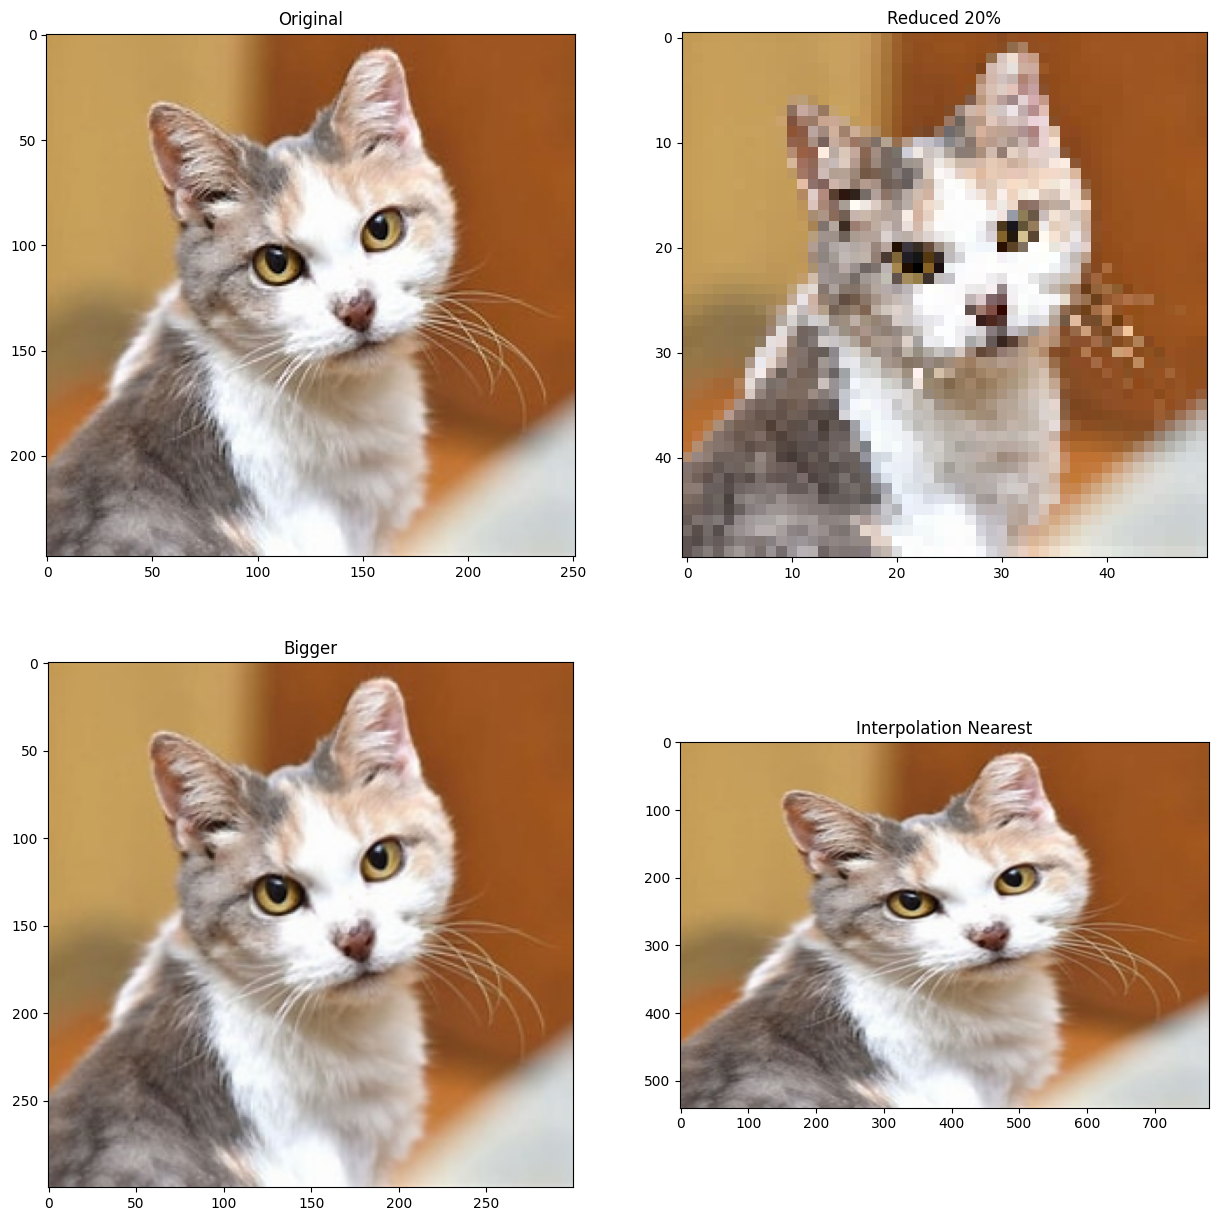

In [29]:
# Display all images with matplotlib 

Titles =["Original", "Reduced 20%", "Bigger", "Interpolation Nearest"]
images =[cat7 ,cat7_reduced1, cat7_big, cat7_linear]
count = 4

f, axs = plt.subplots(2, 2, figsize=(15, 15))
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))

plt.show()

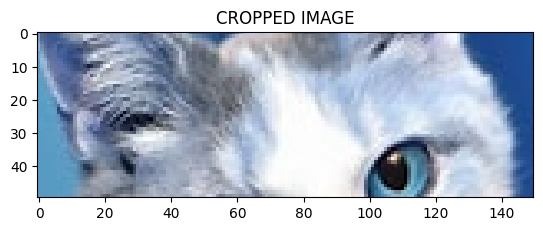

In [24]:
# Subset / crop , use upper left and bottom right coordinates [row size, column size]

subset = cat7[50:100, 50:200]

# Display 
plt.title('CROPPED IMAGE')
plt.imshow(subset)

plt.show()

In [25]:
# Export image 

cv2.imwrite('croped.png', subset)

True

# 5. Geometric Operations. 

In image pre processing encompases multiple techniques intended to transform. enhance, and analyse images. Geometric operations is one of them, it involves applications of algorithms on pixel values in order to change their spatial arrangements i.e scalling, rotation, and transformation. But remember the structural integrity of an item is maintained. 

Image gradients are used to detect egdes i.e contours and outlines in images. They are also used to construct saliency maps that highlight those parts of an image that are easily noticable because, they have hotness/heat. Convolution neural networks, common ones are sobel and laplacian algorithsm, are used to determine pixels with the same gradient / directional angle. The main application of gradient descent is edge detection ; object boundary, shadow or light areas boundary. 

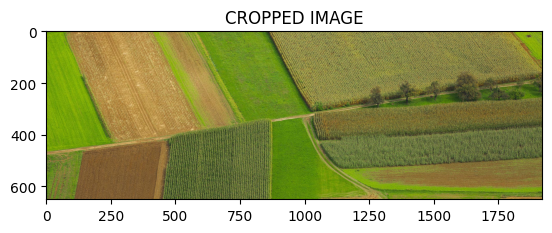

In [4]:
crop = cv2.imread("Img_analysis/cropland.png")
# Display 
plt.title('CROPPED IMAGE')
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

plt.show()

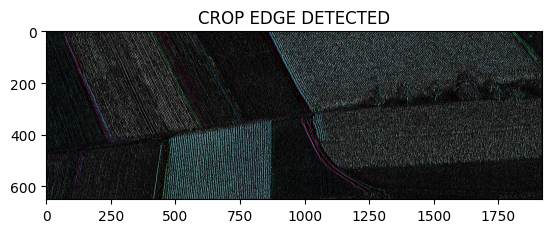

In [30]:
# Sobel Algorithm on x gradient
sobel1 = cv2.Sobel(crop,             # Input
                   cv2.CV_8U,        # Output type 
                   1,0,              # x direction, if y then 0,1
                   ksize=3           # Kernel size 
                   )

# Display 
plt.title('CROP EDGE DETECTED ON X AXIS')
plt.imshow(sobel1)
plt.show()

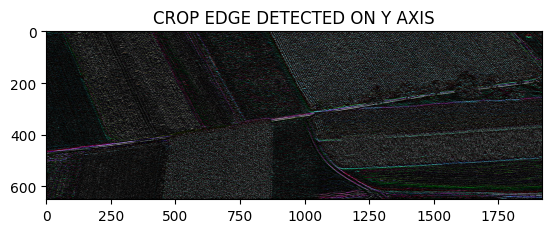

In [31]:
# Sobel Algorithm on y gradient
sobel1 = cv2.Sobel(crop,             # Input
                   cv2.CV_8U,        # Output type 8 bit unsigned integer
                   0,1,              # x direction, if y then 0,1
                   ksize=3           # Kernel size 
                   )

# Display 
plt.title('CROP EDGE DETECTED ON Y AXIS')
plt.imshow(sobel1)
plt.show()

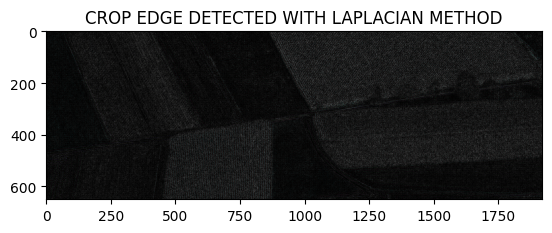

In [33]:
# Lapacian Algorthm, gives gradient on both direction
lapa1 = cv2.Laplacian(crop, cv2.CV_8U)

# Display 
plt.title('CROP EDGE DETECTED WITH LAPLACIAN METHOD')
plt.imshow(lapa1)
plt.show()

# 6. Canny Edge Detection.

Canny Edge Detector is a multistep edge detector used to detect more edge types. 

### Steps.

1. **Noise Reduction.** 

Smoothening of the image is important because edge detection derivatives(functions) are extremely sensitive to noise. The Gaussian blur with specified kernel is applied on the image, a smaller kernel results to an output with blur effect having minimal effect.   

2. **Gradient Claculation.**

This operation detects the gradient intensity and magnitude by applying filters that make changes highly pronounced in both directions, x and y. Sobel kernel used. The result an image with thick edge lines of similar intensity value. 

3. **Non-maximum Suppression.**

This step is intended to correct the output from previous step, 2 above. The algorithm only selects pixels with maximum value in all edge directions in a process defined as non maximum suppression which is basically thining out those thick lines. The results is similar to step 2 only with more thin lines in the image. The next 2 steps is intended to fine tune the image by making the edges more enhanced. 


4. **Double Threshold.**

The fourth steps involves classifying the remaining pixels to three categories based on their values, they include *strong pixels*, *weak pixels*, *other pixels*. The first one have the highest intensity values flagged as high threshold thus are relevent/useful to the edge while the remaining are classified as low threshold. The final step then discerns the two groups.

5. **Edge Tracking.**

This is the final step and it involves transforming weaker pixels into stronger ones only when they meet a condition specified. That only a pixel whose neighbor has a high intensity is graduated as a strong pixel. 


In [37]:
edges = cv2.Canny(crop,          # Input image
                  100, 200       # Threshold values lower and upper respectively
                  )

# Display 
# plt.title('CROP EDGE DETECTED CANNY ALGORITHM.')
# plt.imshow(edges)
# plt.show()
wind(edges)

<center><img src="../Image_Processing/Img_analysis/canny1.png" width=600px height=300px /></center>

# 7. Radiometric Operations.

In [7]:
# Converting an image to grey scale 

crop_grey = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

wind(crop_grey)

<center><img src="../Image_Processing/Img_analysis/crop_greyed.png" width=600px height=300px /></center>

In [8]:
# 7.1 Thresholding.

# Set a threshold value of 150, all pixels below that will be labelled 0 else a maximum value 
# of 255. This technique is used in image segmentation, it separated parts of an image considered
# as foreground and background. 
# We need two values to store the pxels at either ends 

ret, thresh = cv2.threshold(crop, 150, 255, cv2.THRESH_BINARY) 

print(ret, '\n\n')
print(f'Values within threshold : {thresh}')

150.0 


Values within threshold : [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0 255]
  [  0 255 255]
  [  0 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0 255]
  [  0   0   0]
  [  0   0 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0   0]]]


In [15]:
# Display thresholded value , greener areas 

wind(thresh)

<center><img src="../Image_Processing/Img_analysis/thresh1.png" width=600px height=300px /></center>

In [16]:
# Pixels not within threshold

wind(ret)

<center><img src="../Image_Processing/Img_analysis/thresh2.png" width=600px height=300px /></center>

[[2.7000e+01]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [5.1800e+02]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [8.4900e+02]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [0.0000e+00]
 [1.0000e+00]
 [1.3400e+03]
 [0.0000e+00]
 [1.0000e+00]
 [2.0000e+00]
 [0.0000e+00]
 [2.6120e+03]
 [1.0000e+00]
 [1.0000e+00]
 [0.0000e+00]
 [3.1130e+03]
 [0.0000e+00]
 [0.0000e+00]
 [3.9160e+03]
 [1.0000e+00]
 [2.0000e+00]
 [1.0000e+00]
 [4.3980e+03]
 [0.0000e+00]
 [0.0000e+00]
 [4.7960e+03]
 [1.0000e+00]
 [0.0000e+00]
 [5.2910e+03]
 [0.0000e+00]
 [1.0000e+00]
 [6.2550e+03]
 [0.0000e+00]
 [6.1780e+03]
 [0.0000e+00]
 [0.0000e+00]
 [7.1160e+03]
 [1.0000e+00]
 [7.2540e+03]
 [0.0000e+00]
 [7.6280e+03]
 [0.0000e+00]
 [7.8780e+03]
 [0.00

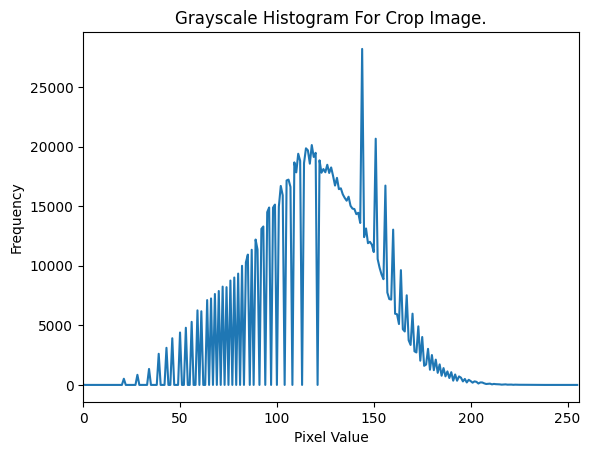

In [18]:
# 7.2 Extract image histogram to depict intensity of pixels 

# Load the image in grey scale 
crop = cv2.imread("Img_analysis/cropland.png", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([crop],       # Image
                    [0],          # Index of grey band 
                    None,          # No masking , find for whole image 
                    [256],        # bin count
                    [0, 256]      # pixel range 
                    )
print(hist)

# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram For Crop Image.")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [20]:
# The histogram above shows values are clustered towards the center, we can stretch this image 
# so that values are closer to the edges i.e near 0 and 256 . This process is called 
# homogenisation , dark parts become more dark while relatively white parts become more pronounced
# because pioxels got new values.

equalised_crop = cv2.equalizeHist(crop_grey)

# Stack two imgages 
res = np.hstack((crop_grey, equalised_crop))

wind(res)

<center><img src="../Image_Processing/Img_analysis/homogize.png" width=800px height=400px /></center>

In [21]:
# 7.3 Image Convolution.

# Bluring is done using normalisation functions called kernels 
# Bluring is a smoothing technique used to reduce noises due to camera effects.
blur1_crop = cv2.blur(crop_grey, 
                      (7, 7)          # Kernel size 
                      )
# Use a lager kernel 
blur2_crop = cv2.blur(crop, (25, 25))

# Stack three imgages 
res2 = np.hstack((crop_grey, blur1_crop, blur2_crop))

wind(res2)

<center><img src="../Image_Processing/Img_analysis/blur.png" width=900px height=400px /></center>

In [22]:
# Gaussian filter ensures that the edes of an images are smoothened as well as curbing 
# excessive blur effects. Bluring also reduces details. 

gaus_blur = cv2.GaussianBlur(crop, 
                             (5, 5),    # kernel size for height and width  
                             0          # standard deviation 
                             )

# Stack two imgages 
res3 = np.hstack((crop_grey, gaus_blur))

wind(res3)

<center><img src="../Image_Processing/Img_analysis/gaus.png" width=900px height=700px /></center>

In [ ]:
# 7.4 Image classification with k means. 
# Classification transforms pixel values from continous to cartegorical data. 

